In [65]:
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, LearningRateScheduler
from time import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from matplotlib.pyplot import figure

In [66]:
# Loading the data, splitting up into test and trainign set 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#print(len(train_images), len(test_images))   #checking original sizes 

In [67]:
# split training data into training and validation
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

In [68]:
#Setting class names so we can get an overview of the data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [69]:
train_images[0].shape


(28, 28)

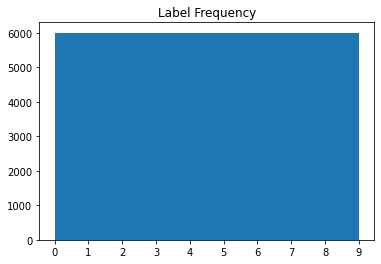

In [70]:
#Checking label distribution, uniform distribution 
train, test = fashion_mnist.load_data()
data = tf.data.Dataset.from_tensor_slices(train)

vals = np.fromiter(data.map(lambda x, y: y), float)

plt.hist(vals)
plt.xticks(range(10))
plt.title('Label Frequency')
plt.show()

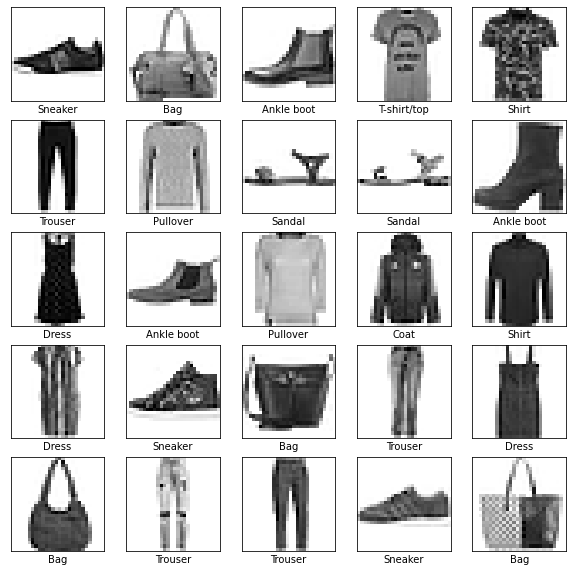

In [71]:

#Plotting a subset of data with labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


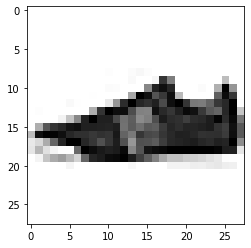

In [72]:
plt.imshow(train_images[0], cmap=plt.cm.binary)

In [73]:
#scale to range 0 - 1 
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

In [74]:
#display some images
def display_image(position):
    image = train_images[position]
    plt.title('Example %d. Label: %s' % (position, class_names[train_labels[position]]))
    plt.imshow(image, cmap=plt.cm.gray_r)

In [75]:
#display_image(22)

In [76]:
# explore the data
print('# of training images:', train_images.shape[0])
print('# of validation images:', validation_images.shape[0])
print('# of test images:', test_images.shape[0])

# of training images: 48000
# of validation images: 12000
# of test images: 10000


In [77]:
print(f"Image shape before: {train_images[0].shape}")

# Pad images with 0s since we want information in the edges, output size should now be 32,32
train_images      = np.pad(train_images, ((0,0),(2,2),(2,2)), 'constant')
validation_images = np.pad(validation_images, ((0,0),(2,2),(2,2)), 'constant')
test_images       = np.pad(test_images, ((0,0),(2,2),(2,2)), 'constant')

print(f"Updated Image Shape: {train_images[0].shape}.")


Image shape before: (28, 28)
Updated Image Shape: (32, 32).


In [78]:
#Baseline model architecture
bl_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Print model summary
bl_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_11 (Avera  (None, 15, 15, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_12 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_6 (Flatten)         (None, 576)               0         
                                                                 
 dense_18 (Dense)            (None, 120)              

In [79]:
#Compile model, use optimiser Adam
bl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Setting number of epochs and batch size
EPOCHS = 15
BATCH_SIZE = 128

#add channel = 1 for greyscale
train_images=train_images[:,:,:,None]
validation_images=validation_images[:,:,:,None]
print("Training images shape: ", train_images.shape)
print("Validation images shape ", validation_images.shape)

X_train, y_train = train_images, to_categorical(train_labels)
X_validation, y_validation = validation_images, to_categorical(validation_labels)



Training images shape:  (48000, 32, 32, 1)
Validation images shape  (12000, 32, 32, 1)


In [80]:
#Fitting the model, performing training
bl_history=bl_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 4s 8ms/step - loss: 0.8255 - accuracy: 0.7275 - val_loss: 0.5904 - val_accuracy: 0.7961
Epoch 2/15
375/375 [==============================] - 3s 7ms/step - loss: 0.5444 - accuracy: 0.8177 - val_loss: 0.5022 - val_accuracy: 0.8357
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.4782 - accuracy: 0.8411 - val_loss: 0.4575 - val_accuracy: 0.8467
Epoch 4/15
375/375 [==============================] - 3s 8ms/step - loss: 0.4410 - accuracy: 0.8549 - val_loss: 0.4464 - val_accuracy: 0.8501
Epoch 5/15
375/375 [==============================] - 3s 7ms/step - loss: 0.4154 - accuracy: 0.8622 - val_loss: 0.4092 - val_accuracy: 0.8692
Epoch 6/15
375/375 [==============================] - 3s 7ms/step - loss: 0.3977 - accuracy: 0.8681 - val_loss: 0.3957 - val_accuracy: 0.8725
Epoch 7/15
375/375 [==============================] - 3s 8ms/step - loss: 0.3814 - accuracy: 0.8729 - val_loss: 0.3804 - val_accuracy: 0.8752
Epoch 

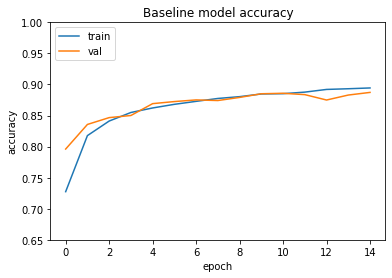

In [81]:
#Plotting the accuracy baseline model
plt.plot(bl_history.history['accuracy'])
plt.plot(bl_history.history['val_accuracy'])
plt.title('Baseline model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

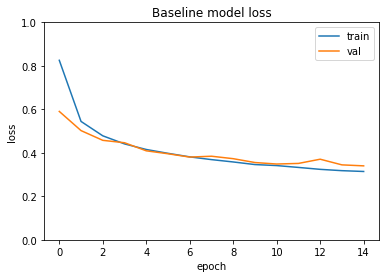

In [82]:
#Plotting the loss for baseline model
plt.plot(bl_history.history['loss'])
plt.plot(bl_history.history['val_loss'])
plt.title('Baseline model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.ylim([0, 1])
plt.show()

In [83]:
#Printing the val & training loss and accuracy for baseline model 
print(f"Baseline model training accuracy: {bl_history.history['accuracy'][-1]} and validation accuracy: {bl_history.history['val_accuracy'][-1]}")
print(f"Baseline model training loss: {bl_history.history['loss'][-1]} and validation loss: {bl_history.history['val_loss'][-1]}")

Baseline model training accuracy: 0.8944166898727417 and validation accuracy: 0.8872500061988831
Baseline model training loss: 0.3142102062702179 and validation loss: 0.3400707542896271


In [84]:
#Save weights of model
bl_model.save_weights("bl_model")

In [85]:
#Model2 DropOut model architecture
dropout_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),                       
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])
dropout_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_13 (Avera  (None, 15, 15, 6)        0         
 gePooling2D)                                                    
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 6)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_14 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 16)         

In [86]:
#Compile and fit model
dropout_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
dropout_history=dropout_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 4s 9ms/step - loss: 0.9183 - accuracy: 0.6770 - val_loss: 0.6359 - val_accuracy: 0.7689
Epoch 2/15
375/375 [==============================] - 3s 8ms/step - loss: 0.6417 - accuracy: 0.7672 - val_loss: 0.5647 - val_accuracy: 0.7871
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.5763 - accuracy: 0.7946 - val_loss: 0.5105 - val_accuracy: 0.8242
Epoch 4/15
375/375 [==============================] - 3s 7ms/step - loss: 0.5393 - accuracy: 0.8089 - val_loss: 0.4625 - val_accuracy: 0.8469
Epoch 5/15
375/375 [==============================] - 3s 7ms/step - loss: 0.5138 - accuracy: 0.8204 - val_loss: 0.4649 - val_accuracy: 0.8457
Epoch 6/15
375/375 [==============================] - 3s 8ms/step - loss: 0.4948 - accuracy: 0.8273 - val_loss: 0.4370 - val_accuracy: 0.8503
Epoch 7/15
375/375 [==============================] - 4s 9ms/step - loss: 0.4773 - accuracy: 0.8324 - val_loss: 0.4216 - val_accuracy: 0.8583
Epoch 

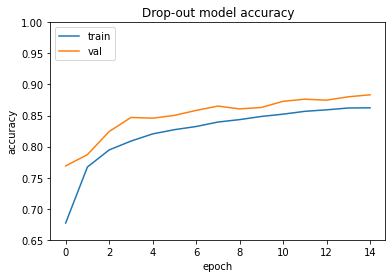

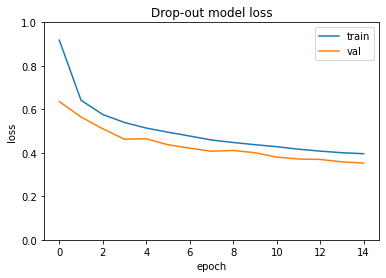

Dropout model training accuracy: 0.8624374866485596 and validation accuracy: 0.8834166526794434
Dropout model training loss: 0.39592278003692627 and validation loss: 0.35274577140808105


In [87]:
#Plotting the accuracy of dropout model
plt.plot(dropout_history.history['accuracy'])
plt.plot(dropout_history.history['val_accuracy'])
plt.title('Drop-out model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss of dropout model
plt.plot(dropout_history.history['loss'])
plt.plot(dropout_history.history['val_loss'])
plt.title('Drop-out model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy of dropout model
print(f"Dropout model training accuracy: {dropout_history.history['accuracy'][-1]} and validation accuracy: {dropout_history.history['val_accuracy'][-1]}")
print(f"Dropout model training loss: {dropout_history.history['loss'][-1]} and validation loss: {dropout_history.history['val_loss'][-1]}")

In [88]:
#Saving weights of dropout model
dropout_model.save_weights("dropout_model")

In [89]:
#Model3 MaxPooling model architecture
maxpool_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.MaxPooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

maxpool_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 6)        0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 576)               0         
                                                                 
 dense_24 (Dense)            (None, 120)              

In [90]:
#Compiling and fitting Maxpool model
maxpool_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
maxpool_history=maxpool_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 4s 8ms/step - loss: 0.7171 - accuracy: 0.7679 - val_loss: 0.4922 - val_accuracy: 0.8479
Epoch 2/15
375/375 [==============================] - 3s 8ms/step - loss: 0.4617 - accuracy: 0.8525 - val_loss: 0.4261 - val_accuracy: 0.8675
Epoch 3/15
375/375 [==============================] - 3s 8ms/step - loss: 0.4097 - accuracy: 0.8693 - val_loss: 0.4064 - val_accuracy: 0.8701
Epoch 4/15
375/375 [==============================] - 3s 7ms/step - loss: 0.3784 - accuracy: 0.8799 - val_loss: 0.3899 - val_accuracy: 0.8765
Epoch 5/15
375/375 [==============================] - 3s 7ms/step - loss: 0.3581 - accuracy: 0.8856 - val_loss: 0.3844 - val_accuracy: 0.8776
Epoch 6/15
375/375 [==============================] - 3s 8ms/step - loss: 0.3438 - accuracy: 0.8907 - val_loss: 0.3578 - val_accuracy: 0.8863
Epoch 7/15
375/375 [==============================] - 3s 7ms/step - loss: 0.3251 - accuracy: 0.8969 - val_loss: 0.3518 - val_accuracy: 0.8863
Epoch 

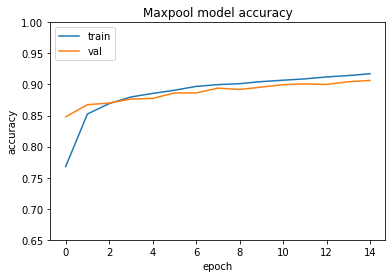

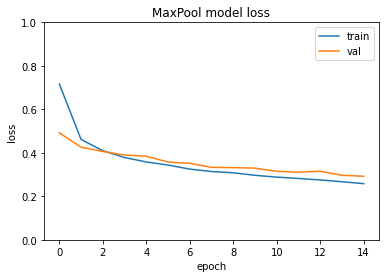

Maxpool model training accuracy: 0.917312502861023 and validation accuracy: 0.906499981880188
Maxpool model training loss: 0.25829410552978516 and validation loss: 0.29237228631973267


In [91]:
#Plotting the accuracy of maxpool model
plt.plot(maxpool_history.history['accuracy'])
plt.plot(maxpool_history.history['val_accuracy'])
plt.title('Maxpool model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss of maxpool model
plt.plot(maxpool_history.history['loss'])
plt.plot(maxpool_history.history['val_loss'])
plt.title('MaxPool model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy of maxpool model
print(f"Maxpool model training accuracy: {maxpool_history.history['accuracy'][-1]} and validation accuracy: {maxpool_history.history['val_accuracy'][-1]}")
print(f"Maxpool model training loss: {maxpool_history.history['loss'][-1]} and validation loss: {maxpool_history.history['val_loss'][-1]}")

In [92]:
#Save weights of maxpool model
maxpool_model.save_weights("maxpool_model")

In [93]:
#Model4 More filters model architecture
filter_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

filter_model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 average_pooling2d_15 (Avera  (None, 15, 15, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 average_pooling2d_16 (Avera  (None, 6, 6, 64)         0         
 gePooling2D)                                                    
                                                                 
 flatten_9 (Flatten)         (None, 2304)              0         
                                                                 
 dense_27 (Dense)            (None, 120)              

In [94]:
#Compile and fit filter model
filter_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
filter_history=filter_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 6s 15ms/step - loss: 0.7733 - accuracy: 0.7563 - val_loss: 0.5467 - val_accuracy: 0.8234
Epoch 2/15
375/375 [==============================] - 5s 14ms/step - loss: 0.4949 - accuracy: 0.8393 - val_loss: 0.4693 - val_accuracy: 0.8483
Epoch 3/15
375/375 [==============================] - 6s 15ms/step - loss: 0.4407 - accuracy: 0.8567 - val_loss: 0.4250 - val_accuracy: 0.8663
Epoch 4/15
375/375 [==============================] - 6s 15ms/step - loss: 0.4112 - accuracy: 0.8673 - val_loss: 0.4073 - val_accuracy: 0.8712
Epoch 5/15
375/375 [==============================] - 6s 15ms/step - loss: 0.3902 - accuracy: 0.8717 - val_loss: 0.3977 - val_accuracy: 0.8724
Epoch 6/15
375/375 [==============================] - 6s 15ms/step - loss: 0.3701 - accuracy: 0.8787 - val_loss: 0.3846 - val_accuracy: 0.8737
Epoch 7/15
375/375 [==============================] - 6s 15ms/step - loss: 0.3633 - accuracy: 0.8803 - val_loss: 0.3836 - val_accuracy: 0.8745

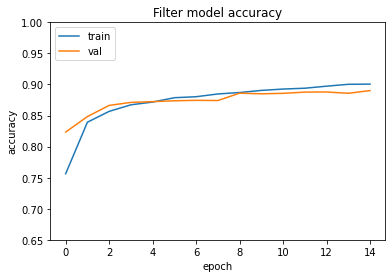

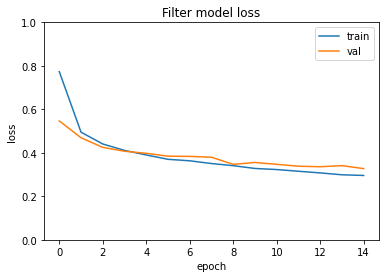

Filter model training accuracy: 0.9006041884422302 and validation accuracy: 0.8901666402816772
Filter model training loss: 0.2959384620189667 and validation loss: 0.32738789916038513


In [95]:
#Plotting the accuracy of filter model
plt.plot(filter_history.history['accuracy'])
plt.plot(filter_history.history['val_accuracy'])
plt.title('Filter model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss of filter model
plt.plot(filter_history.history['loss'])
plt.plot(filter_history.history['val_loss'])
plt.title('Filter model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy of filter model
print(f"Filter model training accuracy: {filter_history.history['accuracy'][-1]} and validation accuracy: {filter_history.history['val_accuracy'][-1]}")
print(f"Filter model training loss: {filter_history.history['loss'][-1]} and validation loss: {filter_history.history['val_loss'][-1]}")

In [96]:
#Saving weights of filter model
filter_model.save_weights("filter_model")

In [97]:
#Model5 1 more convolutional layer model architecture
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),   
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                   
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

conv_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_17 (Avera  (None, 15, 15, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_18 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 average_pooling2d_19 (Avera  (None, 2, 2, 32)       

In [98]:
#Compiling and fitting conv model
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
conv_history=conv_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/15
375/375 [==============================] - 4s 9ms/step - loss: 1.0367 - accuracy: 0.6741 - val_loss: 0.8330 - val_accuracy: 0.7322
Epoch 2/15
375/375 [==============================] - 3s 8ms/step - loss: 0.7680 - accuracy: 0.7413 - val_loss: 0.7428 - val_accuracy: 0.7312
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.7066 - accuracy: 0.7600 - val_loss: 0.6870 - val_accuracy: 0.7606
Epoch 4/15
375/375 [==============================] - 3s 7ms/step - loss: 0.6635 - accuracy: 0.7749 - val_loss: 0.6422 - val_accuracy: 0.7768
Epoch 5/15
375/375 [==============================] - 3s 7ms/step - loss: 0.6255 - accuracy: 0.7880 - val_loss: 0.6025 - val_accuracy: 0.7939
Epoch 6/15
375/375 [==============================] - 3s 7ms/step - loss: 0.6003 - accuracy: 0.7999 - val_loss: 0.5866 - val_accuracy: 0.8018
Epoch 7/15
375/375 [==============================] - 3s 7ms/step - loss: 0.5768 - accuracy: 0.8083 - val_loss: 0.5658 - val_accuracy: 0.8180
Epoch 

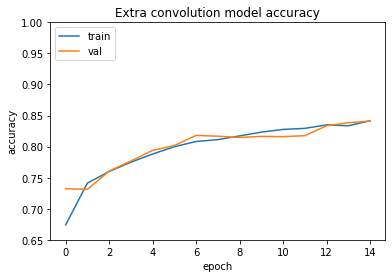

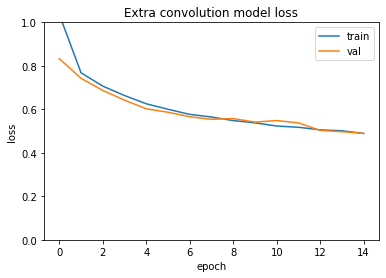

Extra convolution model training accuracy: 0.8416041731834412 and validation accuracy: 0.8409166932106018
Extra convolution model training loss: 0.4888058304786682 and validation loss: 0.48962727189064026


In [99]:
#Plotting the accuracy of conv model
plt.plot(conv_history.history['accuracy'])
plt.plot(conv_history.history['val_accuracy'])
plt.title('Extra convolution model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss of conv model
plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['val_loss'])
plt.title('Extra convolution model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy of conv model
print(f"Extra convolution model training accuracy: {conv_history.history['accuracy'][-1]} and validation accuracy: {conv_history.history['val_accuracy'][-1]}")
print(f"Extra convolution model training loss: {conv_history.history['loss'][-1]} and validation loss: {conv_history.history['val_loss'][-1]}")

In [100]:
#Saving weights of conv model
conv_model.save_weights("conv_model")

In [101]:
#Learningrate decay model architecture
lr_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


lr_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_20 (Avera  (None, 15, 15, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_21 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_11 (Flatten)        (None, 576)               0         
                                                                 
 dense_33 (Dense)            (None, 120)             

In [102]:
"""Schedule function to reduce the learning rate to half every 5 epochs"""

def scheduler(epoch, lr):
  if epoch > 0 and (epoch % 5 == 0):
    return lr * 0.5
  else:
    return lr

#Create callback for adapting learning rate
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)

In [103]:
"""Set initial learningrate to 0.1, use SGD here instead of Adam as Adam has internal learning rate management that is not compatible with most learning rate schedules"""
opt = tf.keras.optimizers.SGD(learning_rate=0.1) #Can also try with 0.01
lr_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
lr_history=lr_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation), callbacks=[callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 1/15
375/375 [==============================] - 4s 8ms/step - loss: 1.0243 - accuracy: 0.6541 - val_loss: 0.7026 - val_accuracy: 0.7552 - lr: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 2/15
375/375 [==============================] - 3s 8ms/step - loss: 0.6269 - accuracy: 0.7778 - val_loss: 0.5818 - val_accuracy: 0.7901 - lr: 0.1000

Epoch 3: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.5508 - accuracy: 0.8079 - val_loss: 0.5258 - val_accuracy: 0.8229 - lr: 0.1000

Epoch 4: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 4/15
375/375 [==============================] - 3s 8ms/step - loss: 0.5135 - accuracy: 0.8204 - val_loss: 0.4970 - val_accuracy: 0.8313 - lr: 0.1000

Epoch 5: LearningRateScheduler setting learning rate to 0.100000001

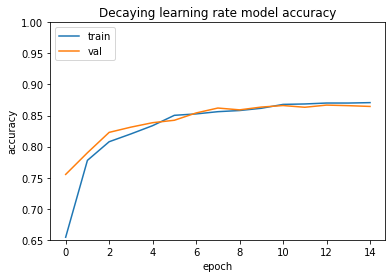

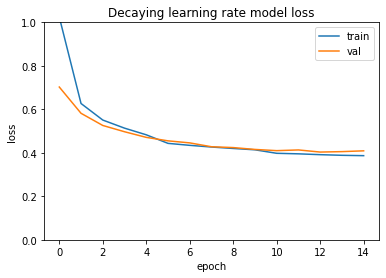

Decaying lr model training accuracy: 0.8707916736602783 and validation accuracy: 0.8646666407585144
Decaying lr model training loss: 0.386940062046051 and validation loss: 0.40916305780410767


In [104]:
#Plotting the accuracy for lr_model
plt.plot(lr_history.history['accuracy'])
plt.plot(lr_history.history['val_accuracy'])
plt.title('Decaying learning rate model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss for lr_model
plt.plot(lr_history.history['loss'])
plt.plot(lr_history.history['val_loss'])
plt.title('Decaying learning rate model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.ylim([0, 1])
plt.show()

#Printing the val & training loss and accuracy 
print(f"Decaying lr model training accuracy: {lr_history.history['accuracy'][-1]} and validation accuracy: {lr_history.history['val_accuracy'][-1]}")
print(f"Decaying lr model training loss: {lr_history.history['loss'][-1]} and validation loss: {lr_history.history['val_loss'][-1]}")

In [105]:
#save learning rate model
lr_model.save_weights("lr_model")

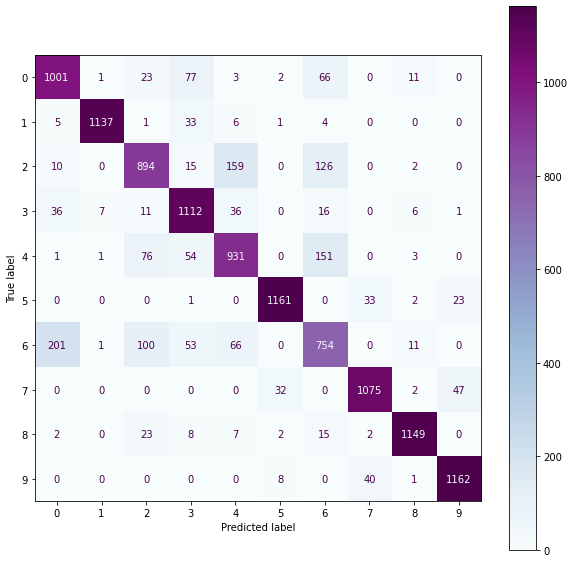

In [115]:
#Make confusion matrix with scikitlearn that shows number of images classified correctly and incorrectly
y_pred = lr_model.predict(validation_images)
y_true = validation_labels             
y_pred_class = np.argmax(y_pred, axis=1)

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(validation_labels, y_pred_class, cmap="BuPu", ax=ax)  #BuPu, pink_r, PuBu, binary, Greens, CMRmap_r
plt.show()

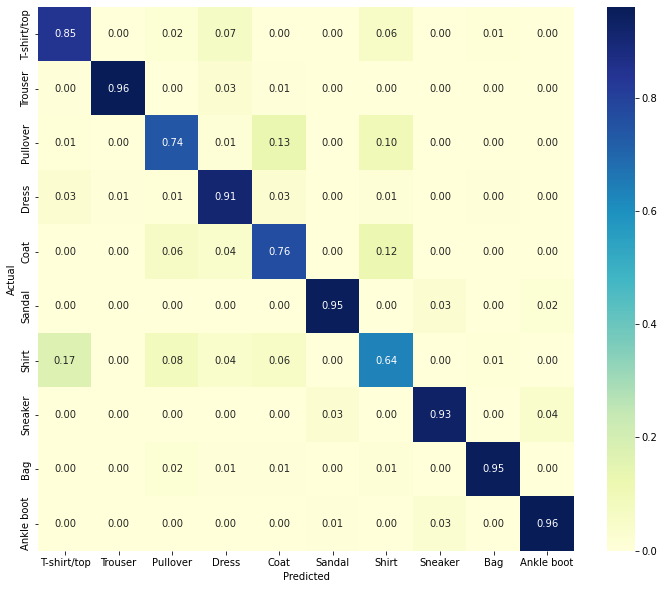

In [116]:
#Normalised heatmap using seaborn that shows percentage of correctly classified (and missclassified) labels
cm = confusion_matrix(validation_labels, y_pred_class)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu") #YlGnBu, Blues, CMRmap_r, pink_r, binary, BuPu, PuBu, Reds
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [108]:
#Take arbitrary image and add empty dimension to fit input
img = train_images[0][None,:,:,:]

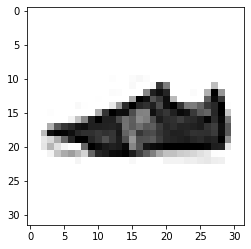

In [109]:
#Display Image (x=32, y=32 since we have padding)
plt.imshow(img.reshape((32,32)), cmap=plt.cm.binary)

The shape of the conv2d_24 is =======>> (1, 30, 30, 6)
The shape of the average_pooling2d_20 is =======>> (1, 15, 15, 6)
The shape of the conv2d_25 is =======>> (1, 13, 13, 16)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


The shape of the average_pooling2d_21 is =======>> (1, 6, 6, 16)
The shape of the flatten_11 is =======>> (1, 576)
The shape of the dense_33 is =======>> (1, 120)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


The shape of the dense_34 is =======>> (1, 84)
The shape of the dense_35 is =======>> (1, 10)


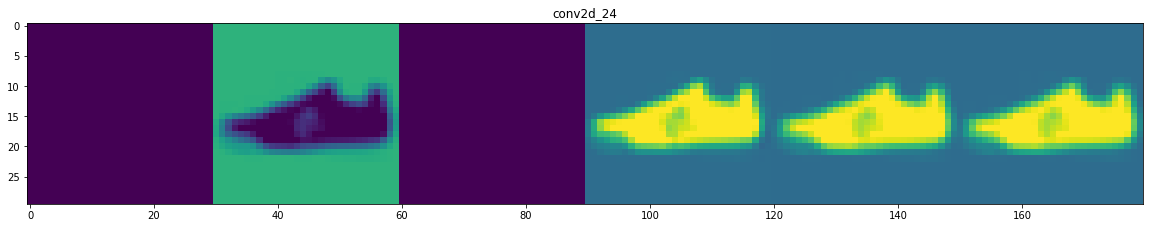

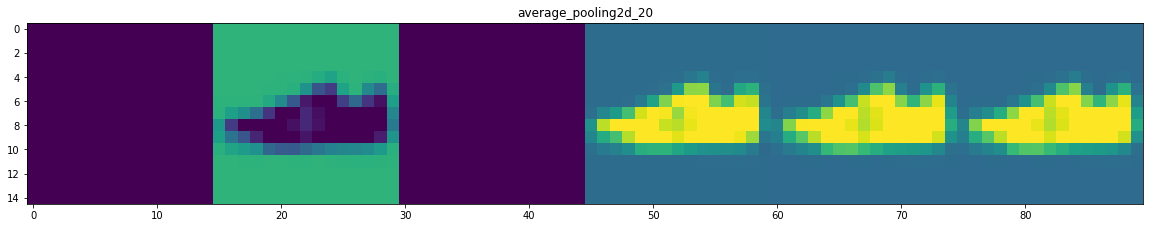

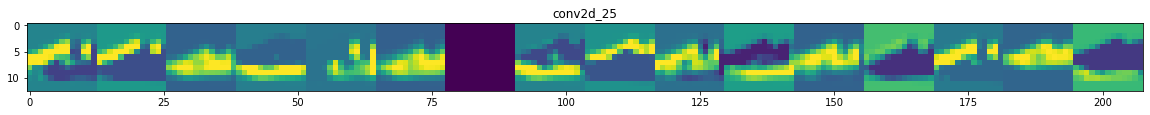

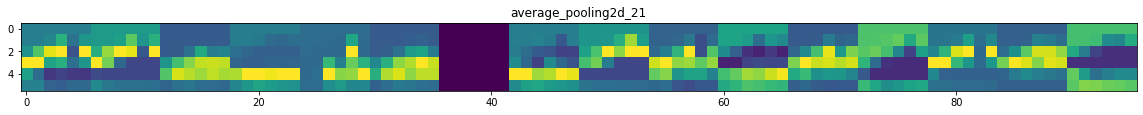

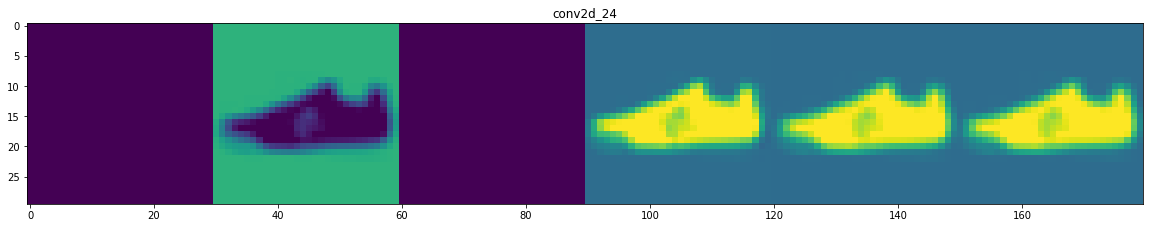

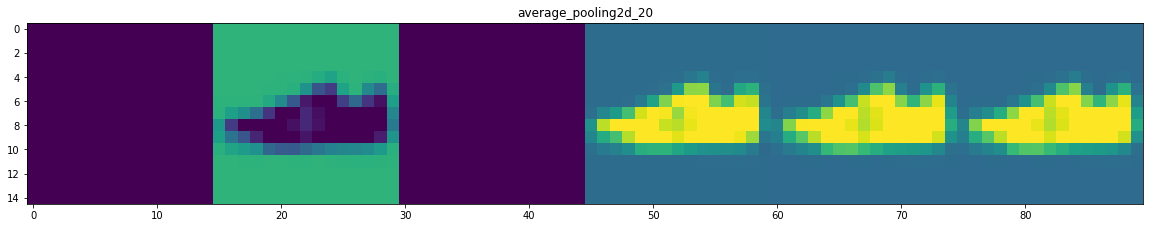

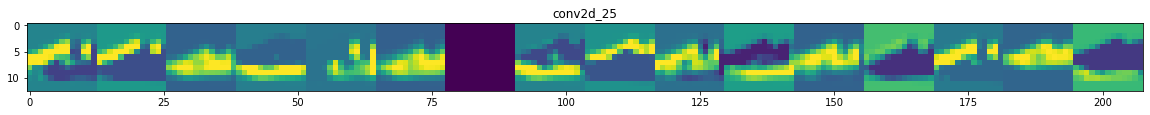

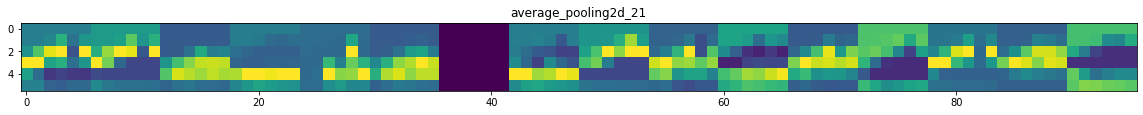

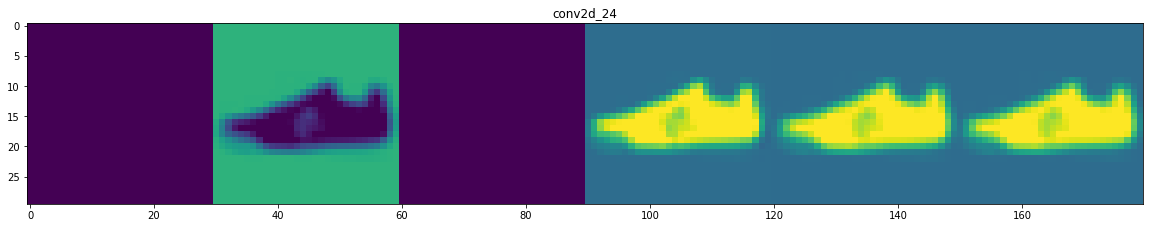

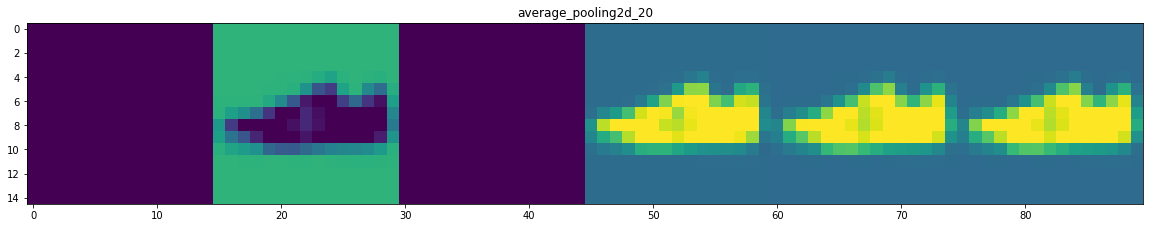

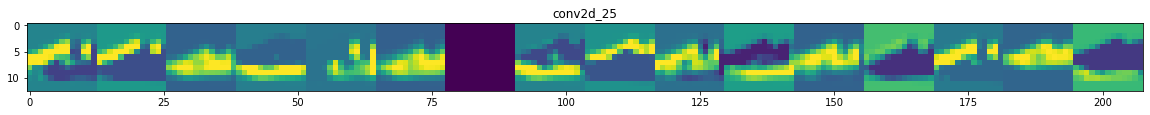

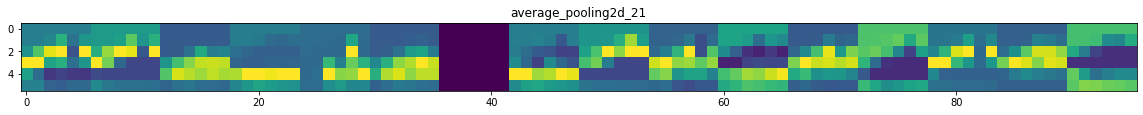

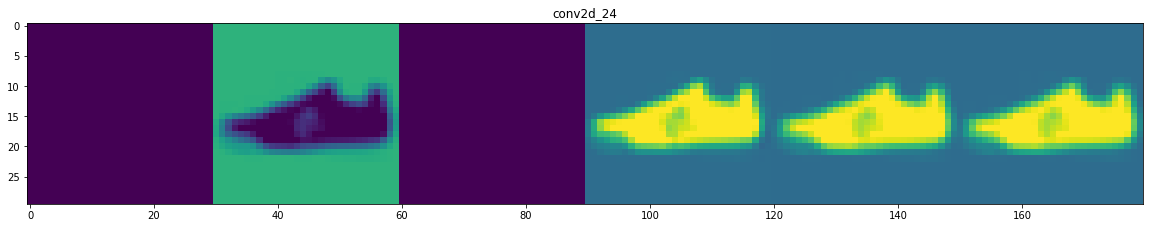

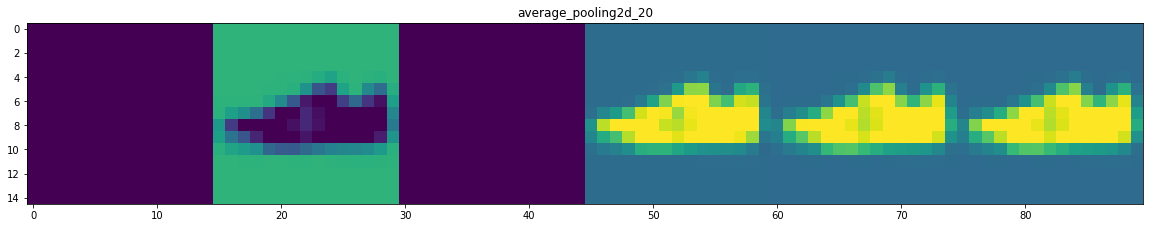

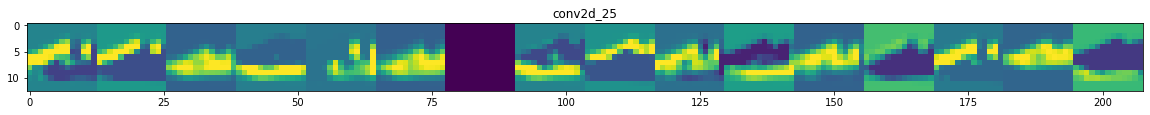

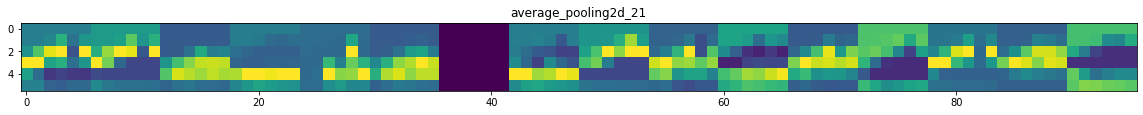

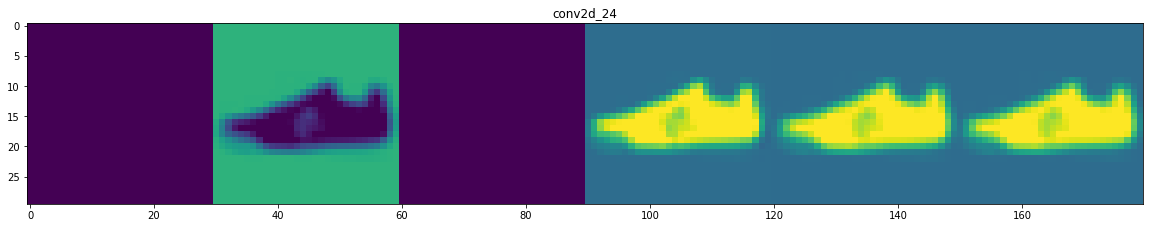

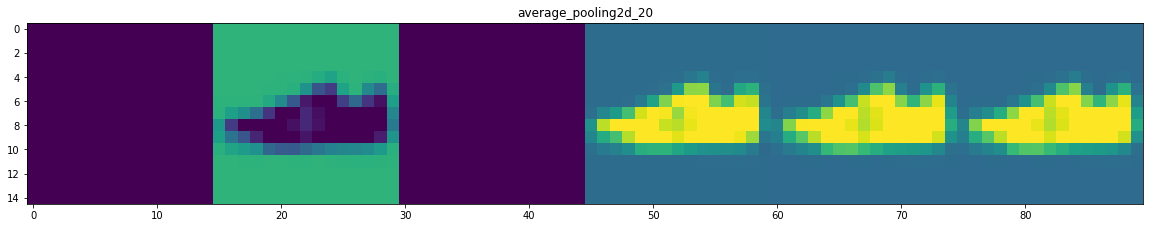

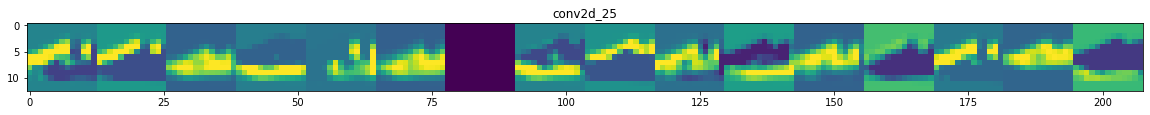

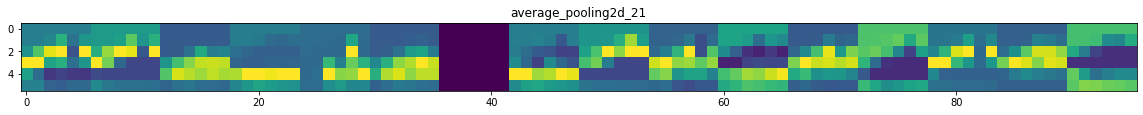

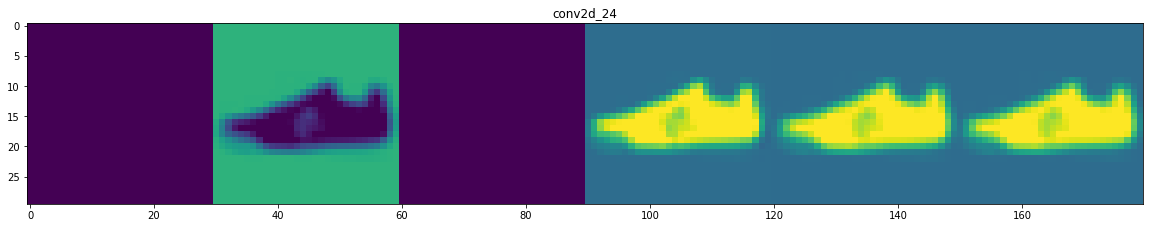

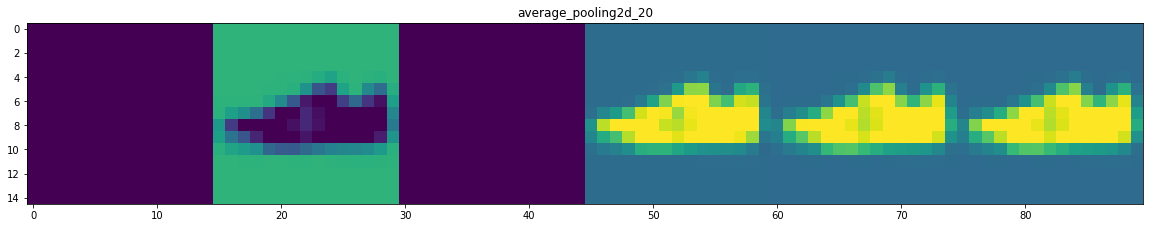

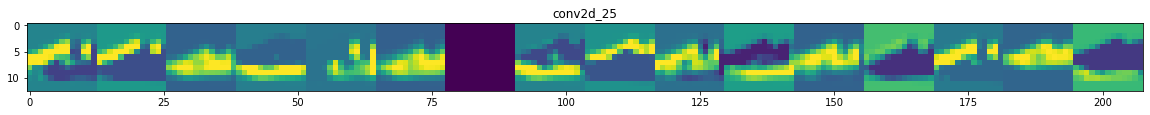

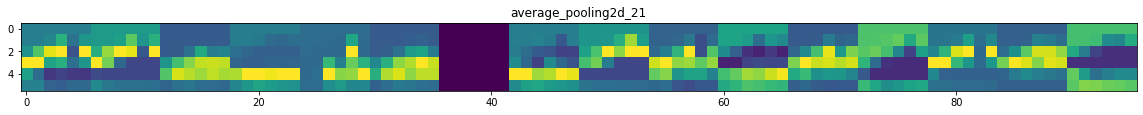

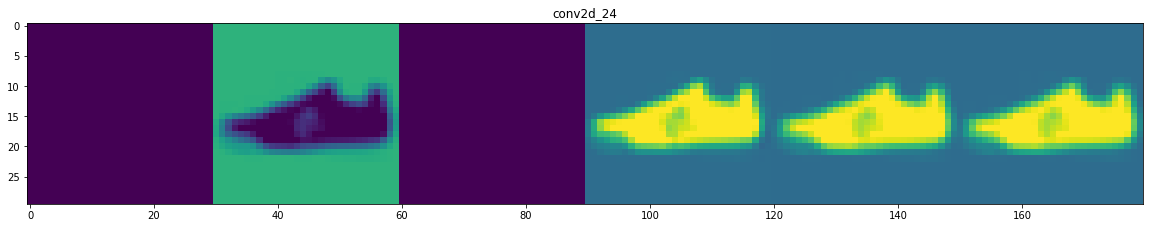

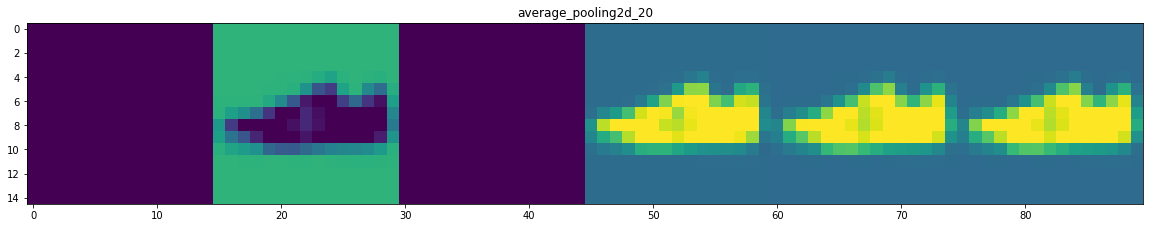

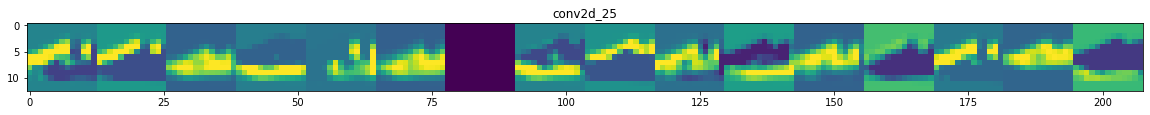

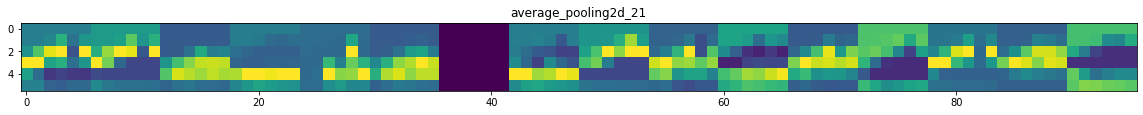

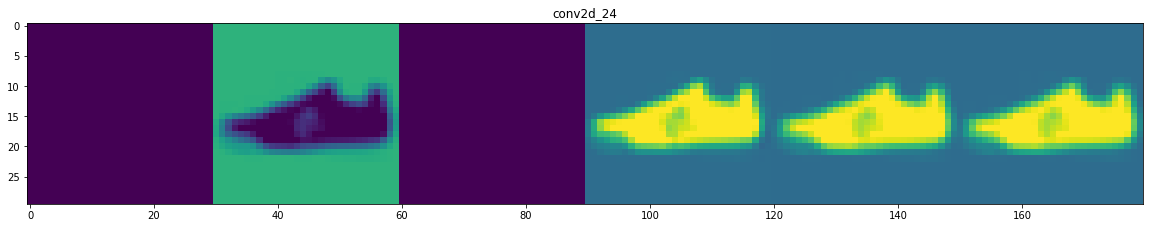

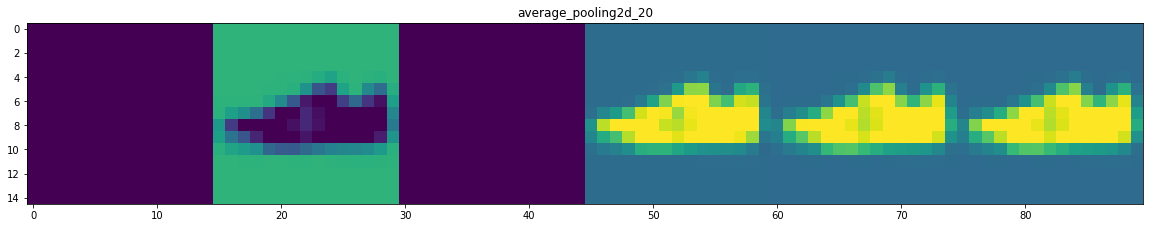

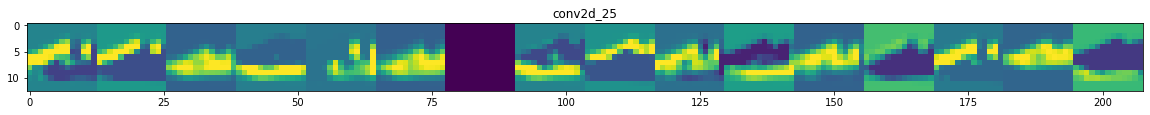

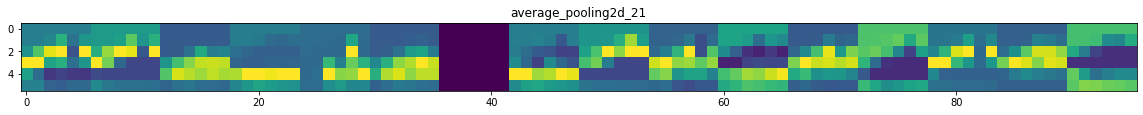

In [110]:
"""Building visualisation for output layers"""

#Get the name of the layers
layer_names = [layer.name for layer in lr_model.layers]

#print(lr_model.layers) #Checking the different layers
layer_outputs = [layer.output for layer in lr_model.layers] #Create list of the outputs for all layers
visualisation_model = tf.keras.models.Model(inputs=lr_model.input, outputs=layer_outputs) #Creating a model for visualisation with the same input as analysed model and output all the intermediate layers of model


feature_maps = visualisation_model.predict(img) #pass image into the visualisation model to get the feature maps

for layer_name, feature_map in zip(layer_names, feature_maps):
  print(f"The shape of the {layer_name} is =======>> {feature_map.shape}") #Print shape of each feature map for each output layer

  for layer_name, feature_map in zip(layer_names, feature_maps):   
    if len(feature_map.shape) == 4: #this makes sure we only get output from convolutional layers
      feature_dim = feature_map.shape[-1]  #Getting the number of feature dimensions for a featuremap of each layer
      size = feature_map.shape[1] 
      image_grid = np.zeros((size,size* feature_dim))  
      #img_array = []
      for i in range(feature_dim):   #iterate over a feature map of a layer and separate all feature images. 
        img = feature_map[0, :, :, i]
        img -= img.mean()
        img /= img.std ()
        img *=  64
        img += 128
        img = np.clip(img, 0, 255).astype('uint8')
        #img_array.append(img)

      #for i in img_array:  
        image_grid[:, i * size : (i + 1) * size] += img

      scale = 20. / feature_dim
      plt.figure( figsize=(scale * feature_dim, scale) )
      plt.title ( layer_name )
      plt.grid  ( False )
      plt.imshow(image_grid, aspect='auto')

In [111]:
#Test Best Model 1 - based on accuracy: MaxPooling  (Evaluate)
score = maxpool_model.evaluate(test_images, to_categorical(test_labels))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.3076 - accuracy: 0.9029
Test loss: 0.3076203465461731
Test accuracy: 0.902899980545044


Ankle boot


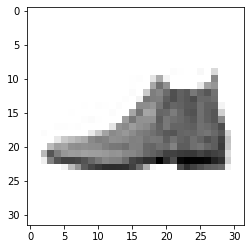

In [112]:
#Test Best Model 1 - based on accuracy: MaxPooling  (predict)
predictions = maxpool_model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
#Plot test image
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.show()

In [113]:
#Test Best Model 2 - based on accuracy: Filter (Evaluate)
score = filter_model.evaluate(test_images, to_categorical(test_labels))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.3457 - accuracy: 0.8834
Test loss: 0.34565916657447815
Test accuracy: 0.883400022983551


Ankle boot


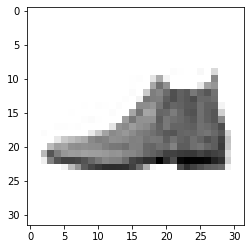

In [114]:
#Test Best Model 2 - based on accuracy: Filter (predict)
predictions = filter_model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
#Plot test image
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.show()